In [249]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error

In [250]:
sns.set_style('darkgrid')
PLOT_WIDE = (14,7)
PLOT_MEDIUM = (8,4)

In [251]:
data = load_iris()

In [252]:
data.keys()

data.data[:5], data.target[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

In [253]:
X = data.data
y = data.target

X.shape, y.shape

((150, 4), (150,))

In [254]:
# 3 classes 
len(np.unique(y))

3

In [255]:
# 4 features
X.shape[1]

4

In [256]:
y = y.reshape(-1,1)
encoder = OneHotEncoder()
y = encoder.fit_transform(y).toarray()

In [257]:
# split train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [258]:
# Split train, validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [259]:
print('X_train: ', X_train.shape, X_train.dtype)
print('X_val: ', X_val.shape, X_val.dtype)
print('X_test: ', X_test.shape, X_test.dtype)
print('y_train: ', y_train.shape, y_train.dtype)
print('y_val: ', y_val.shape, y_val.dtype)
print('y_test: ', y_test.shape, y_test.dtype)


X_train:  (96, 4) float64
X_val:  (24, 4) float64
X_test:  (30, 4) float64
y_train:  (96, 3) float64
y_val:  (24, 3) float64
y_test:  (30, 3) float64


In [260]:
m = X_train.shape[1] * 2
n = X_train.shape[1]

m, n

(8, 4)

In [261]:
dropout_pct = 0.3
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=4))
model.add(Dropout(dropout_pct))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(dropout_pct))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(dropout_pct))
model.add(Dense(units=3, activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 64)                320       
                                                                 
 dropout_20 (Dropout)        (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 dropout_21 (Dropout)        (None, 32)                0         
                                                                 
 dense_31 (Dense)            (None, 16)                528       
                                                                 
 dropout_22 (Dropout)        (None, 16)                0         
                                                                 
 dense_32 (Dense)            (None, 3)               

In [262]:
model.compile(loss = 'categorical_crossentropy', \
              optimizer = 'Adam', metrics=['accuracy'])

In [263]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, \
                   patience = 10, verbose = 1, mode = 'auto')

historico = model.fit(X_train,
                        y_train,
                        epochs = 1000,
                        verbose = 1,
                        validation_data = (X_val, y_val),
                        callbacks=[es])

Epoch 1/1000


3/3 [==============================] - 1s 83ms/step - loss: 1.5232 - accuracy: 0.3229 - val_loss: 1.1794 - val_accuracy: 0.2083
Epoch 2/1000
3/3 [==============================] - 0s 13ms/step - loss: 1.4052 - accuracy: 0.3333 - val_loss: 1.1022 - val_accuracy: 0.2083
Epoch 3/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.5134 - accuracy: 0.3750 - val_loss: 1.0481 - val_accuracy: 0.5417
Epoch 4/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.2327 - accuracy: 0.3750 - val_loss: 1.0144 - val_accuracy: 0.5417
Epoch 5/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.1867 - accuracy: 0.4062 - val_loss: 0.9918 - val_accuracy: 0.7917
Epoch 6/1000
3/3 [==============================] - 0s 13ms/step - loss: 1.1894 - accuracy: 0.4062 - val_loss: 0.9710 - val_accuracy: 0.7917
Epoch 7/1000
3/3 [==============================] - 0s 13ms/step - loss: 1.2830 - accuracy: 0.2604 - val_loss: 0.9567 - val_accuracy: 0.7917
Epoch 8/1000
3/3 [========

1/1 [==============================] - 0s 97ms/step
ACCURACY SCORE:

0.9666666666666667


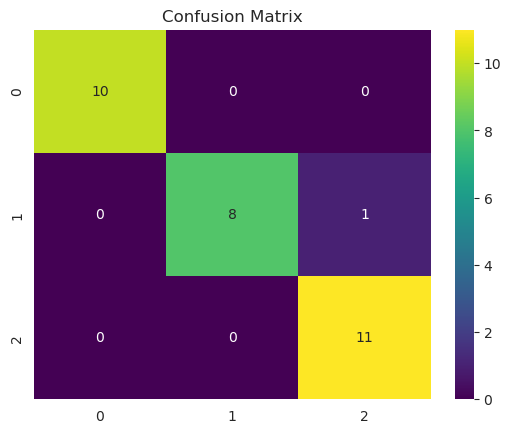

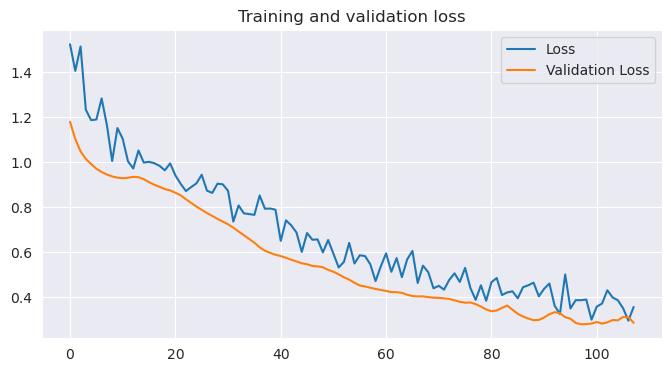

In [264]:
def print_results(historico_):
    loss = historico_.history['loss']
    val_loss = historico_.history['val_loss']
    epochs = range(len(loss))

    plt.figure(figsize=PLOT_MEDIUM)
    # sns.lineplot(None, x=epochs, y=loss, markers=True, dashes=False)
    # sns.lineplot(None, x=epochs, y=val_loss)
    sns.lineplot(None, x=epochs, y=loss, label='Loss')
    sns.lineplot(None, x=epochs, y=val_loss, label='Validation Loss')
    
    # plt.plot(epochs, loss, 'bo', label = 'Training loss')
    # plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

def run_pred(model_, historico_, X_test_, y_test_):
    y_pred = model_.predict(X_test_)
    
    print("ACCURACY SCORE:\n\r")
    print(accuracy_score(y_test_.argmax(1), y_pred.argmax(1)))

    cf = confusion_matrix(y_test_.argmax(1), y_pred.argmax(1))
    sns.heatmap(cf, annot=True, cmap='viridis')
    plt.title("Confusion Matrix")
    plt.show()

    print_results(historico_)

run_pred(model, historico, X_test, y_test)
